# Seismic
**Some Basics**


Author: Emmanuel Castillo

emmanuel.castillotaborda@utdallas.edu

In [1]:
import sys

if 'google.colab' in sys.modules:
    !git clone https://github.com/ecastillot/FieldCampII_2025.git
    !pip install obspy obsplus

Cloning into 'FieldCampII_2025'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 200 (delta 30), reused 73 (delta 16), pack-reused 111 (from 3)
Receiving objects: 100% (200/200), 335.10 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (104/104), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.41
    Uninstalling SQLAlchemy-2.0.41:
      Successfully uninstalled SQLAlchemy-2.0.41
  Attempting uninstall: numpy
    Found e

# Clone our repository

In [1]:
! git clone https://github.com/ecastillot/FieldCampII_2025.git /content/FieldCampII_2025

fatal: destination path '/content/FieldCampII_2025' already exists and is not an empty directory.


In [2]:
import sys
lib = "/content/FieldCampII_2025"
sys.path.append(lib)

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from fc2.seismic import read_waveforms,read_stations,read_shots

# Visualization

We just cloned the data to understand the raw format

In [5]:
data_path = os.path.join(os.getcwd(),"FieldCampII_2025","data","ROC_S_050725")
shots_folder = os.path.join(data_path,"SourceTesting")
waveforms_folder = os.path.join(data_path,"PwaveSeismic")
stations_folder = os.path.join(waveforms_folder,"FDSN Information")

print(f"shots_folder: {shots_folder}")
print(f"waveforms_folder: {waveforms_folder}")
print(f"stations_folder: {stations_folder}")
print("---------------------------")
print(f"Existing files in shots_folder: {os.listdir(shots_folder)}")
print(f"Existing files in waveforms_folder: {os.listdir(waveforms_folder)}")
print(f"Existing files in stations_folder: {os.listdir(stations_folder)}")

shots_folder: /content/FieldCampII_2025/data/ROC_S_050725/SourceTesting
waveforms_folder: /content/FieldCampII_2025/data/ROC_S_050725/PwaveSeismic
stations_folder: /content/FieldCampII_2025/data/ROC_S_050725/PwaveSeismic/FDSN Information
---------------------------
Existing files in shots_folder: ['TB_INT00136.csv', 'Pretest', 'ConvertShotTime_May2025.m', 'Shot_Times_Clean.xlsx', 'AutoImport_CSV.m', 'DIGISOLO.LOG', 'TB_INT00142.csv']
Existing files in waveforms_folder: ['453025770.0001.2025.05.07.15.43.00.000.Z.miniseed', '453025794.0001.2025.05.07.15.41.51.000.E.miniseed', '453026207.0001.2025.05.07.15.43.54.000.N.miniseed', '453025794.0001.2025.05.07.15.41.51.000.N.miniseed', '453024589.0001.2025.05.07.15.43.21.000.N.miniseed', '453026185.0001.2025.05.07.15.44.51.000.Z.miniseed', '453026138.0001.2025.05.07.15.44.54.000.Z.miniseed', '453024638.0001.2025.05.07.15.44.24.000.E.miniseed', '453026125.0001.2025.05.07.15.43.57.000.Z.miniseed', '453026165.0001.2025.05.07.15.44.42.000.N.minise

## Shots

We will use read_shots function to read the shots

In [6]:
help(read_shots)

Help on function read_shots in module fc2.seismic:

read_shots(filepath, gps_start=None)
    Parses a custom-formatted CSV file containing GPS time and location data for each shot.
    
    Parameters
    ----------
    filepath : str
        Path to the input CSV file.
    gps_start : datetime.datetime or None
        The GPS epoch start time. If None, defaults to January 6, 1980.
    
    Returns
    -------
    pd.DataFrame
        A DataFrame with columns: shot, year, month, day, hour, minute, second, latitude, longitude.



In [8]:
shot_name = "TB_INT00142.csv"
shot_path = os.path.join(shots_folder,shot_name)
shot_df = read_shots(shot_path)
display(shot_df.head())

,shot,year,month,day,hour,minute,second,latitude,longitude
0,1,2025,5,7,15,34,16.25,32.99,96.76
1,2,2025,5,7,15,53,30.85,32.99,96.76
2,3,2025,5,7,15,53,37.35,32.99,96.76
3,4,2025,5,7,15,53,43.05,32.99,96.76
4,5,2025,5,7,15,53,49.00,32.99,96.76


## Stations

In [9]:
help(read_stations)

Help on function read_stations in module fc2.seismic:

read_stations(folder_path: str)
    Reads all XML files in a specified folder and concatenates them into a single DataFrame.
    Parameters
    ----------
    folder_path : str
        Path to the folder containing XML files.
    Returns
    -------
    pd.DataFrame
        A DataFrame containing the concatenated data from all XML files.



In [10]:
stations_df = read_stations(stations_folder)
display(stations_df.head())

,network,station,location,channel,seed_id,latitude,longitude,elevation,depth,azimuth,dip,sample_rate,start_date,end_date
0,SS,25161,SW,GPZ,SS.25161.SW.GPZ,32.986930,-96.758201,212.600006,0.0,0.0,90.0,1000.0,2025-05-07 15:44:24,2025-05-07 16:19:02
1,SS,24131,SW,GPZ,SS.24131.SW.GPZ,32.986924,-96.758282,212.100000,0.0,0.0,90.0,1000.0,2025-05-07 15:42:27,2025-05-07 16:16:20


## Waveforms

In [11]:
help(read_waveforms)

Help on function read_waveforms in module fc2.seismic:

read_waveforms(folder_path: str, station: str = '*', component: str = '*', starttime: obspy.core.utcdatetime.UTCDateTime = None, endtime: obspy.core.utcdatetime.UTCDateTime = None) -> obspy.core.stream.Stream
    Reads MiniSEED files using station/component wildcards and filters by time range.
    
    Parameters:
    - folder_path (str): Directory with MiniSEED files.
    - station (str): Wildcard for station code (e.g., "4530*", "*" for all).
    - component (str): Wildcard for component (e.g., "E", "Z", "*").
    - starttime (UTCDateTime, optional): Start of time window to include.
    - endtime (UTCDateTime, optional): End of time window to include.
    
    Returns:
    - stream (obspy.Stream): Combined Stream object with filtered traces.



In [12]:
st = read_waveforms(waveforms_folder)
st

72 Trace(s) in Stream:

SS.24131.SW.GPE | 2025-05-07T15:42:27.000000Z - 2025-05-07T16:16:20.000000Z | 1000.0 Hz, 2033001 samples
...
(70 other traces)
...
SS.26226.SW.GPZ | 2025-05-07T15:42:57.000000Z - 2025-05-07T16:17:37.000000Z | 1000.0 Hz, 2080001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

Feel free to do a more specific query

In [13]:
st = read_waveforms(waveforms_folder,station="*243*",component="Z")
st

2 Trace(s) in Stream:
SS.24311.SW.GPZ | 2025-05-07T15:43:48.000000Z - 2025-05-07T16:17:16.000000Z | 1000.0 Hz, 2008001 samples
SS.24341.SW.GPZ | 2025-05-07T15:43:48.000000Z - 2025-05-07T16:18:46.000000Z | 1000.0 Hz, 2098001 samples

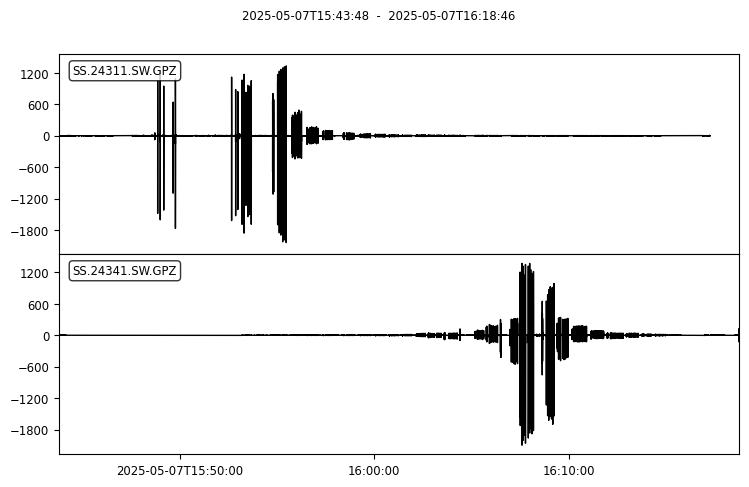

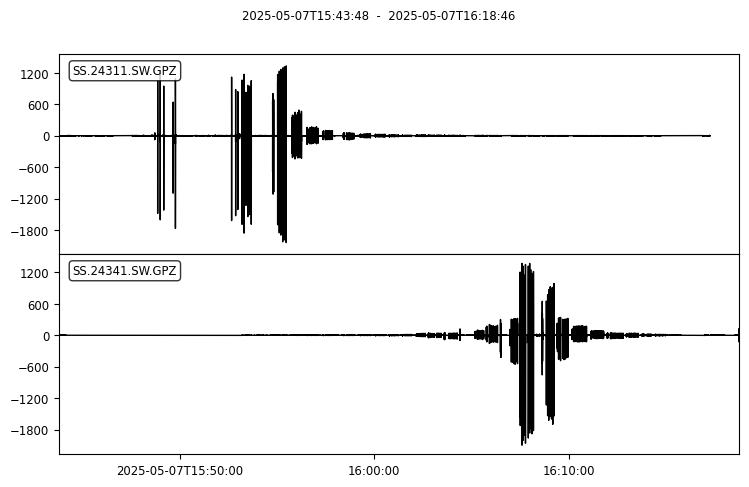

In [14]:
st.plot(method="full")